In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.duplicated().sum()

415

In [6]:
df= df.drop_duplicates(keep='first')

In [7]:
df.duplicated().sum()

0

<Axes: xlabel='Category'>

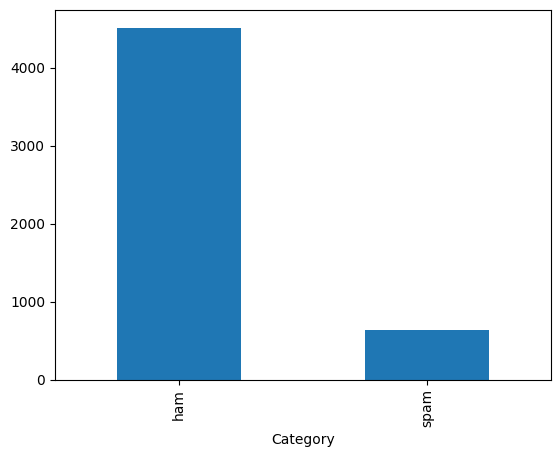

In [8]:
df['Category'].value_counts().plot(kind='bar')

In [9]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)


In [12]:
df['target']  = encoder.fit_transform(df[['target']])

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
df.head()

,target,text
0,1.0,"Go until jurong point, crazy.. Available only ..."
1,1.0,Ok lar... Joking wif u oni...
2,0.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1.0,U dun say so early hor... U c already then say...
4,1.0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ghost
[nltk_data]     Codm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
df['Num_characater'] = df['text'].apply(len)

In [16]:
df.head()

,target,text,Num_characater
0,1.0,"Go until jurong point, crazy.. Available only ...",111
1,1.0,Ok lar... Joking wif u oni...,29
2,0.0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1.0,U dun say so early hor... U c already then say...,49
4,1.0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df['word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,target,text,Num_characater,word
0,1.0,"Go until jurong point, crazy.. Available only ...",111,24
1,1.0,Ok lar... Joking wif u oni...,29,8
2,0.0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1.0,U dun say so early hor... U c already then say...,49,13
4,1.0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['sentence'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,Num_characater,word,sentence
0,1.0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1.0,Ok lar... Joking wif u oni...,29,8,2
2,0.0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1.0,U dun say so early hor... U c already then say...,49,13,1
4,1.0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[df['target']==1][['Num_characater','word','sentence']].describe()

,Num_characater,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

<Axes: ylabel='Count'>

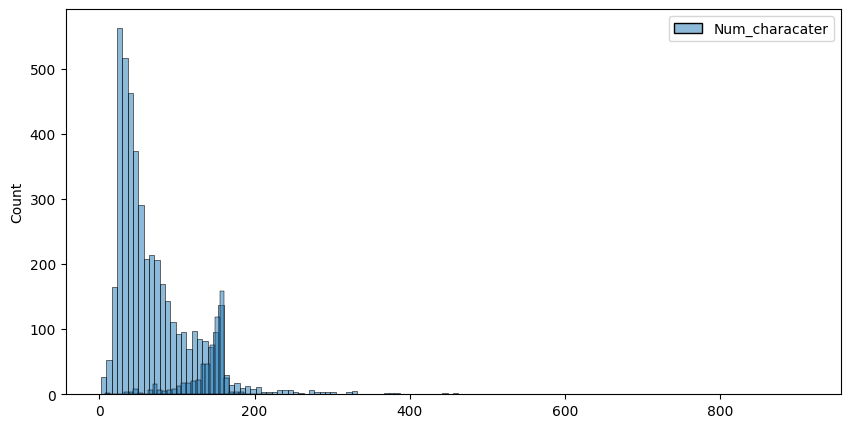

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==1][['Num_characater']])
sns.histplot(df[df['target']==0][['Num_characater']])

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [24]:
transform_text('i gonna give you a kiss! if you dont mind')

'gon na give kiss dont mind'

In [25]:
df['transformed_text'] = df['text'].apply(transform_text)

In [26]:
df.head()

,target,text,Num_characater,word,sentence,transformed_text
0,1.0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1.0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0.0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1.0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1.0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [27]:
spam_copurs = []
for msg in df[df['target'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        spam_copurs.append(word)

In [28]:
len(spam_copurs)

9781

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfdf = TfidfVectorizer(max_features=3000)

In [30]:
X = tfdf.fit_transform(df['transformed_text']).toarray()

In [31]:
X.shape

(5157, 3000)

In [32]:
y = df['target'].values

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=2)


In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [35]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [36]:
gnb.fit(xtrain,ytrain)
y_pred = gnb.predict(xtest)
print('Accuracy is: ',accuracy_score(ytest,y_pred))
print('confusion matrics is: ',confusion_matrix(ytest,y_pred))
print('Precision score is: ',precision_score(ytest,y_pred))

Accuracy is:  0.8672480620155039
confusion matrics is:  [[110  17]
 [120 785]]
Precision score is:  0.9788029925187033


In [37]:
mnb.fit(xtrain,ytrain)
y_pred = mnb.predict(xtest)
print('Accuracy is: ',accuracy_score(ytest,y_pred))
print('confusion matrics is: ',confusion_matrix(ytest,y_pred))
print('Precision score is: ',precision_score(ytest,y_pred))

Accuracy is:  0.9709302325581395
confusion matrics is:  [[ 97  30]
 [  0 905]]
Precision score is:  0.9679144385026738


In [38]:
bnb.fit(xtrain,ytrain)
y_pred = bnb.predict(xtest)
print('Accuracy is: ',accuracy_score(ytest,y_pred))
print('confusion matrics is: ',confusion_matrix(ytest,y_pred))
print('Precision score is: ',precision_score(ytest,y_pred))

Accuracy is:  0.9835271317829457
confusion matrics is:  [[112  15]
 [  2 903]]
Precision score is:  0.9836601307189542


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier



In [78]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [79]:
clfs = {
    'SVC':svc,
    'KN' : knc,
    'NB' : mnb,
    "DT" : dtc,
    "LR" : lrc,
    'RF' : rfc,
    'Adaboost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    
}

In [89]:
def train_classification(clf, xtrain, ytrain, xtest, ytest):
    clf.fit(xtrain, ytrain)
    pred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, pred)
    precision = precision_score(ytest, pred)
    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classification(clf, xtrain, ytrain, xtest, ytest)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


TypeError: 'list' object is not callable

In [84]:
train_classification(svc,xtrain,ytrain,xtest,ytest)

(0.9757751937984496, 0.9751619870410367)

In [88]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classification(clf, xtrain,ytrain,xtest,ytest)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

TypeError: 'list' object is not callable

In [40]:
import pickle
pickle.dump(tfdf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))